In [1]:
import numpy as np
import scipy.integrate as sp
import random as rd
import math as mp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
steps =  10
birds =  50
H     =    0.1
beta  =    0.5
ndim  =    3

init_vel_max = 18
init_vel_min = 10
init_radius = 50

x_upper_bound = birds * ndim
v_lower_bound = x_upper_bound
v_upper_bound = 2 * birds * ndim

In [3]:
time_values = np.zeros((steps))
for i in range (steps):
    time_values[i] = i

In [4]:
init_phase_space = np.zeros((birds * 2 * ndim))

In [5]:
def get_pos(bird_set, i, k):
    return bird_set[i*ndim + k]
def get_vel(bird_set, i, k):
    return bird_set[v_lower_bound + i*ndim + k]

In [6]:
def pos_diff_norm(bird_set, i, j):
    somma=0
    for k in range(ndim):
        somma += (get_pos(bird_set, i, k) - get_pos(bird_set, j, k))**2
    somma = mp.sqrt(somma)
    return somma

In [7]:
def vel_diff_norm(bird_set, i, j):
    somma=0
    for k in range(ndim):
        somma += (get_vel(bird_set, i, k) - get_vel(bird_set, j, k))**2
    somma = mp.sqrt(somma)
    return somma

In [8]:
def Aij(bird_set, i, j):
    return H / (pow(1 + pow(vel_diff_norm(bird_set, i, j), 2), beta))

In [9]:
def rhs_equation(t, phase_space):
    vett = np.zeros(birds * 2 * ndim)    
    
    #equazioni differenziali delle posizioni
    for i in range (birds):
        x_i = i*ndim
        for k in range(ndim):
            vett[x_i + k] = get_vel(phase_space, i, k)
    
    #equazioni differenziali delle velocità
    for i in range (birds):
        v_i = v_lower_bound + ndim * i
        
        somma = np.zeros((ndim))
        #somma per ogni componente di i
        
        for k in range (ndim):
            for j in range (birds):
                v_jk = get_vel(phase_space, j, k)
                v_ik = get_vel(phase_space, i, k)
                somma[k] += Aij(phase_space, i, j) * (v_jk - v_ik)
            vett[v_i + k] = somma[k]
    return vett

In [10]:
rd.seed()

#inizializzo le posizioni
for i in range (birds):
    x_i = ndim * i
    theta_x = rd.random() * mp.pi
    phi_x = rd.random() * 2 * mp.pi
    r = rd.random() * init_radius
    
    init_phase_space[x_i + 0]= r * mp.cos(phi_x) * mp.sin(theta_x)
    init_phase_space[x_i + 1]= r * mp.sin(phi_x) * mp.sin(theta_x)
    init_phase_space[x_i + 2]= r * mp.cos(theta_x)

#inizializzo le velocità
for i in range (birds):
    v_i = v_lower_bound + ndim * i
    theta_v = rd.random() * mp.pi
    phi_v = rd.random() * 2 * mp.pi
    v = rd.random() * (init_vel_max - init_vel_min) + init_vel_min
    
    init_phase_space[v_i + 0]= v * mp.cos(phi_v) * mp.sin(theta_v)
    init_phase_space[v_i + 1]= v * mp.sin(phi_v) * mp.sin(theta_v)
    init_phase_space[v_i + 2]= v * mp.cos(theta_v)

#print (init_phase_space.reshape(2, birds, ndim))

    
"""
ps = init_phase_space.reshape(2, birds, ndim)[1, :, :]

ax = plt.axes(projection ='3d')
ax.scatter(ps[:, 0], ps[:,1], ps[:,2])
plt.show()

print (init_phase_space.reshape(2, birds, ndim))
"""

"\nps = init_phase_space.reshape(2, birds, ndim)[1, :, :]\n\nax = plt.axes(projection ='3d')\nax.scatter(ps[:, 0], ps[:,1], ps[:,2])\nplt.show()\n\nprint (init_phase_space.reshape(2, birds, ndim))\n"

In [11]:
solution = sp.solve_ivp(fun=rhs_equation,y0 = init_phase_space, t_span=(0,steps))
print("done")

done


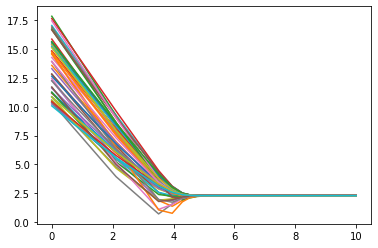

In [12]:
pos = solution.y[ : x_upper_bound]
vel = solution.y[v_lower_bound : ]
times = solution.t

#Converto in array 3D
vel = vel.reshape((birds, ndim, len(times)))
pos = pos.reshape((birds, ndim, len(times)))

vel = np.round(vel, 5)
pos = np.round(pos, 5)
times = np.round(times, 5)

file = open(f"classico birds={birds} times={times.size} b={beta}.txt", "w+")
file.write("Num.\tVelx\tVely\tVelz\tPosx\tPosy\tPosz\tTimes\tStep\n")

ucc = 0
t = 0
for i in range(times.size * birds):
    file.write(str(ucc) + "\t" + str(vel[ucc][0][t]) + "\t" + str(vel[ucc][1][t]) + "\t" + str(vel[ucc][2][t]) + 
               "\t" + str(pos[ucc][0][t]) + "\t" + str(pos[ucc][1][t]) + "\t" + str(pos[ucc][2][t]) + 
               "\t" + str(times[t]) + "\t" + str(t) + "\n")
    ucc += 1
    if ucc == birds:
        ucc = 0
        t += 1     

norm_vel = np.zeros((birds, len(times)))
for i in range(birds):
    for t in range(len(times)):
        norm_vel[i, t] = np.linalg.norm(vel[i, :, t])
   
for i in range(birds):
    plt.plot(times, norm_vel[i,:])

file.close()